In [71]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import helpers
import random

In [72]:
# Importing the training and test data

image_dir_training = "../../day_night_images/training/"
image_dir_test = "../../day_night_images/test/"
TRAINING_LIST = helpers.load_dataset(image_dir_training)

In [73]:
print(len(TRAINING_LIST))

240


In [74]:
# Method to resize all images to 600x1100 (hxw)
def standardise_shape(img):
    
    standardised_img = cv2.resize(img,(1100,600))
    return standardised_img

In [75]:
# Method to encode the labels of images
def assign_label(label):
    
    if label=='night':
        return 0
    elif label=='day':
        return 1
    else:
        return -1

In [76]:
# Method to create a new list of standardised images utilising the methods above
def standardise(img_list):
    
    standardised_list = []
    
    for image in img_list:
        
        picture = image[0]
        label = image[1]
        
        standardised_image = standardise_shape(picture)
        encoded_label = assign_label(label)
        
        standardised_list.append((standardised_image,encoded_label))
    
    return standardised_list

In [77]:
final_list = standardise(TRAINING_LIST)

In [78]:
len(final_list)

240

### Prediction using the HSV color space

In [79]:
# Running some manual tests on an index of our choice
index = 10
test_image = final_list[index][0]
test_label = final_list[index][1]

In [80]:
# Converting the image from RGB to HSV color space
hsv_image = cv2.cvtColor(test_image,cv2.COLOR_RGB2HSV)

In [81]:
# Extracting the individual H,S, and V values
h = hsv_image[:,:,0]
s = hsv_image[:,:,1]
v = hsv_image[:,:,2]

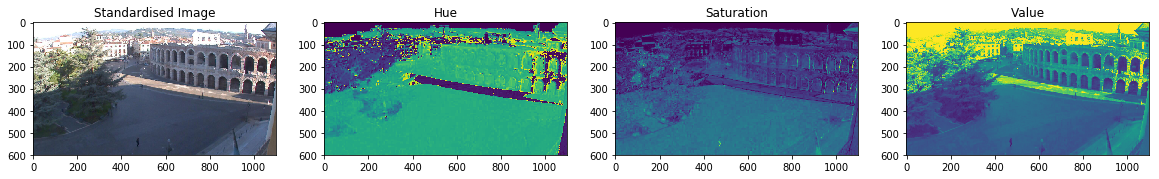

In [82]:
# Plotting graphs to show the original image along with H,S and V values
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,10))
ax1.set_title('Standardised Image')
ax1.imshow(test_image)
ax2.set_title('Hue')
ax2.imshow(h)
ax3.set_title('Saturation')
ax3.imshow(s)
ax4.set_title('Value')
ax4.imshow(v)

In [83]:
# Clearly, V highlights the sky best and so lets set a manual threshold for night vs day
threshold = 90

### Finding the average brightness using the V channel

In [84]:
# Method to compute average brightness for an image
def avg_brightness(rgb_image):
    
    hsv_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)
    
    value_sum = np.sum(hsv_image[:,:,2])
    dimensions = 660 * 1100
    avg_brightness = value_sum / dimensions
    if avg_brightness>threshold:
        # Day
        return 1 
    else:
       # Night
        return 0

In [85]:
# Method to run a test prediction and see its accuracy
def run_test_prediction(test_index,inputlist):

    thresh_image = inputlist[test_index][0]
    time_of_day = avg_brightness(thresh_image)
    if time_of_day==1:
        print('Day')
    else:
        print('Night')
    plt.imshow(thresh_image)

Day


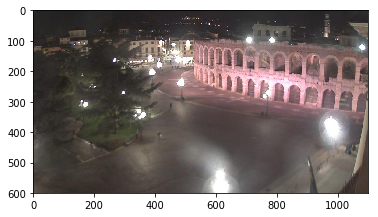

In [86]:
run_test_prediction(200,final_list)

In [87]:
# Method to compute the accuracy of the training/test set using this manual classification method
def compute_accuracy(input_list):
    wrong_classifications = 0
    for i in range(len(input_list)):
    
        image = input_list[i][0]
        label = input_list[i][1]
     
        prediction = avg_brightness(image)
        if prediction!=label:
            wrong_classifications+=1
    
    print('\n\nNumber of wrong classifications = ',wrong_classifications)
    accuracy = (len(input_list) - wrong_classifications) / len(input_list)
    print('\n\nTherefore, the accuracy is: {:.2f}%'.format(accuracy*100))

In [88]:
# Computing the accuracy of the Training Set
compute_accuracy(final_list)



Number of wrong classifications =  37


Therefore, the accuracy is: 84.58%


In [89]:
TEST_LIST = helpers.load_dataset(image_dir_test)

In [90]:
print(len(TEST_LIST))

160


In [91]:
standardised_test_list = standardise(TEST_LIST)
random.shuffle(standardised_test_list)

In [92]:
print(len(standardised_test_list))

160


Day


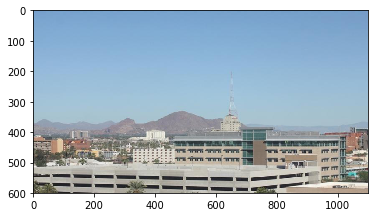

In [93]:
# Running a test prediction on the Test Set
run_test_prediction(110,standardised_test_list)

In [94]:
# Computing the accuracy for the Test set
compute_accuracy(standardised_test_list)



Number of wrong classifications =  10


Therefore, the accuracy is: 93.75%
